# 6.6 Economic Freedom Data: Time Series

## This Script Contains the Following points

### 1. Importing Libraries
### 2. Importing  and Checking Data sets

### 3. Time Series Analysis: Decomposition
### 4. Stationarity
### 5. Round 2 of Startionarity and D-F
### 6. Round 3 of Startionarity and D-F


### 1. Importing Libraries

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html


from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

In [2]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [3]:
# Configure API key 

quandl.ApiConfig.api_key = 'pSrb65WG-XCWzmuL9iup'

### 2. Importing and Checking Data sets

In [4]:
#Define path
path = r'/Users/mistystone/Library/CloudStorage/OneDrive-Personal/Documents/CF_Data_Ach6_Dashboard/Economic_Freedom_Analysis/'

In [5]:
# Importing the Federal Reserve Economic Data "Real Potential GDP" variable.

data = quandl.get('FRED/GDPPOT')

In [6]:
data.head(5)

,Value
Date,
1949-01-01,2102.982630
1949-04-01,2130.581305
1949-07-01,2159.340530
1949-10-01,2186.844859
1950-01-01,2216.058359


In [7]:
data.shape

(332, 1)

In [8]:
data.columns

Index(['Value'], dtype='object')

In [9]:
type(data)

pandas.core.frame.DataFrame

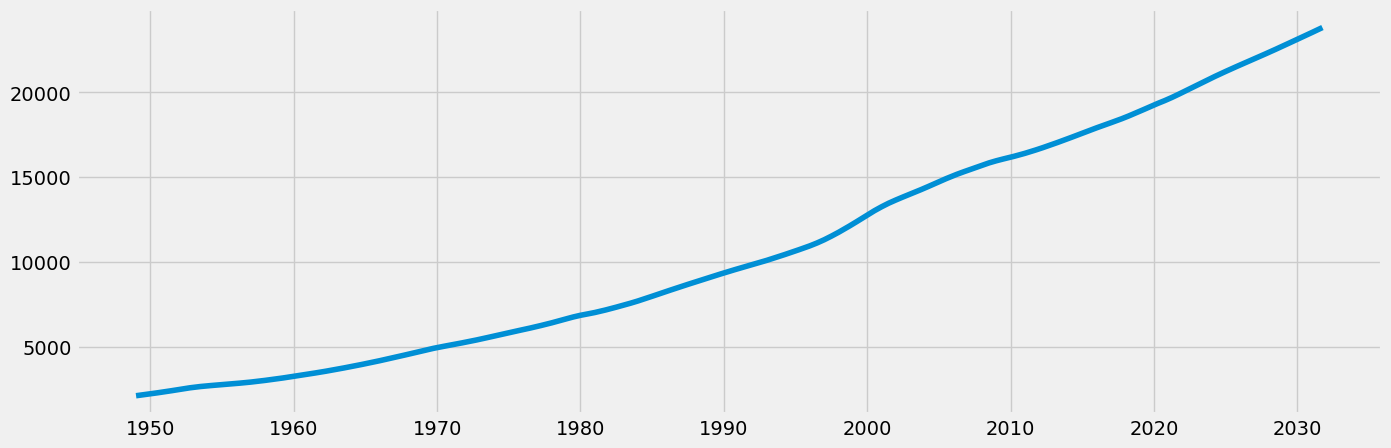

In [10]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(data)

We subset the data because the original data includes a forecast. 

In [11]:
# Reset index so that you can use the "Date" column as a filter

data_2 = data.reset_index()

In [12]:
data_2.head()

,Date,Value
0,1949-01-01,2102.982630
1,1949-04-01,2130.581305
2,1949-07-01,2159.340530
3,1949-10-01,2186.844859
4,1950-01-01,2216.058359


In [13]:
# Taking a subset of the data
data_sub = data_2.loc[(data_2['Date'] >= '1949-01-01') & (data_2['Date'] < '2022-01-01')]

In [14]:
data_sub.shape

(292, 2)

In [15]:
data_sub.head()

,Date,Value
0,1949-01-01,2102.982630
1,1949-04-01,2130.581305
2,1949-07-01,2159.340530
3,1949-10-01,2186.844859
4,1950-01-01,2216.058359


In [16]:
# Set the "Date" column as the index

from datetime import datetime

data_sub['datetime'] = pd.to_datetime(data_sub['Date']) # Create a datetime column from "Date.""
data_sub = data_sub.set_index('datetime') # Set the datetime as the index of the dataframe.
data_sub.drop(['Date'], axis=1, inplace=True) # Drop the "Date" column.
data_sub.head()

,Value
datetime,
1949-01-01,2102.982630
1949-04-01,2130.581305
1949-07-01,2159.340530
1949-10-01,2186.844859
1950-01-01,2216.058359


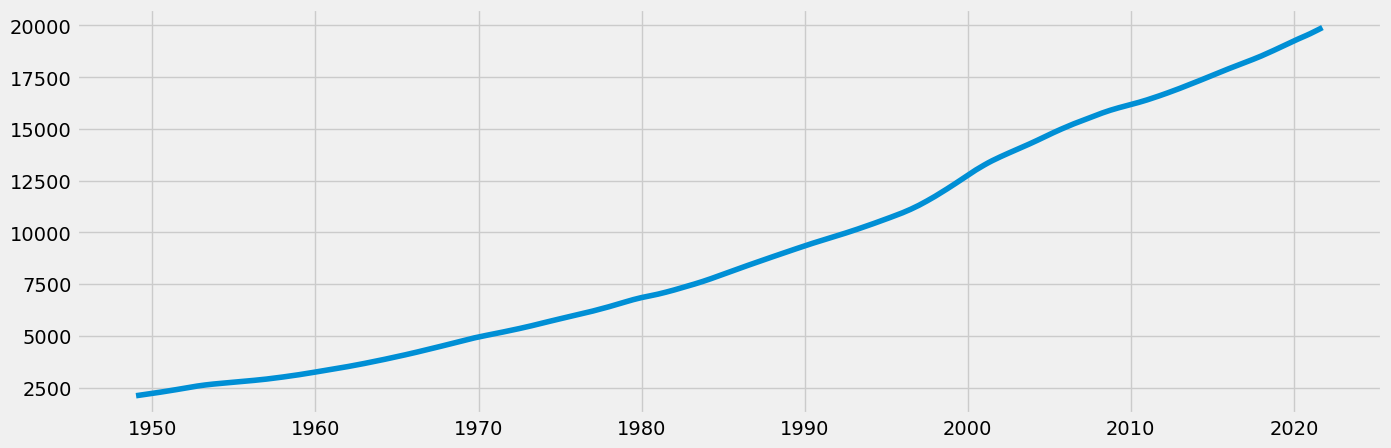

In [17]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub)

In [19]:
# Check for missing values

data_sub.isnull().sum() 
#No Missing

Value    0
dtype: int64

In [20]:
# Check for duplicates

dups = data_sub.duplicated()
dups.sum()

# No dups!

0

### 3. Time Series Analysis: Decomposition

In [23]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive')

In [24]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

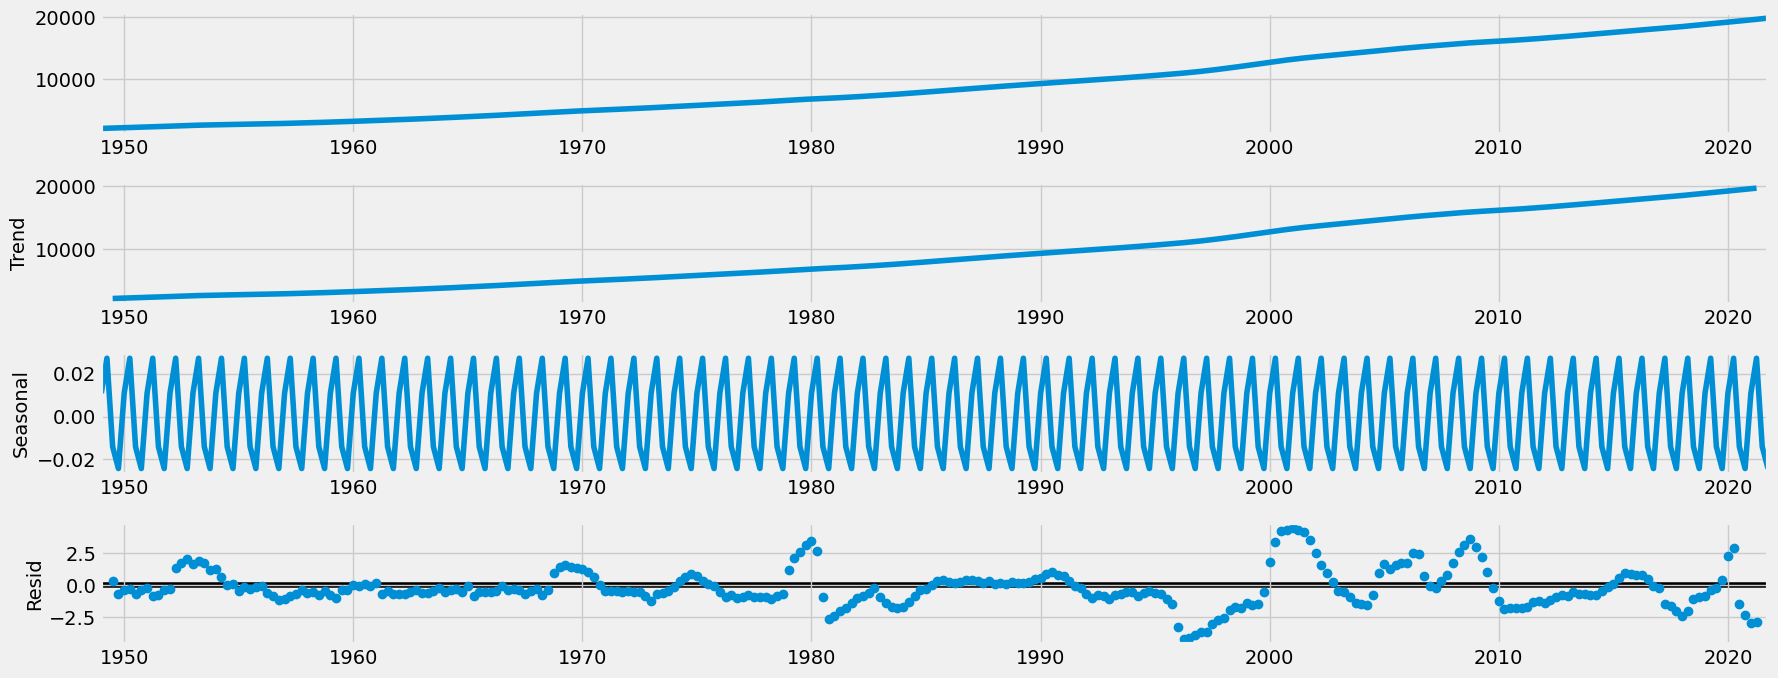

In [25]:
# Plot the separate components

decomposition.plot()
plt.show()

The top chart shows the data and the second shows the general trend. As expected, there is a general upward trend in US GDP data. The slope of the trend does seem to get a bit steeper in the late 90s and flatten out a bit in the mid 2000s. Note that this data starts after WW2, so we aren't getting the effect of the Great Depression. The next chart shows the seasonality of the data, which oscilates as epected. The residual chart represents the noise. The residuals seem to be the most pronounced during recessions -- 1980s, early 2000s, etc. 

### 4. Stationarity

In [26]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_sub['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                   2.432255
p-value                          0.999025
Number of Lags Used              4.000000
Number of Observations Used    287.000000
Critical Value (1%)             -3.453342
Critical Value (5%)             -2.871664
Critical Value (10%)            -2.572164
dtype: float64


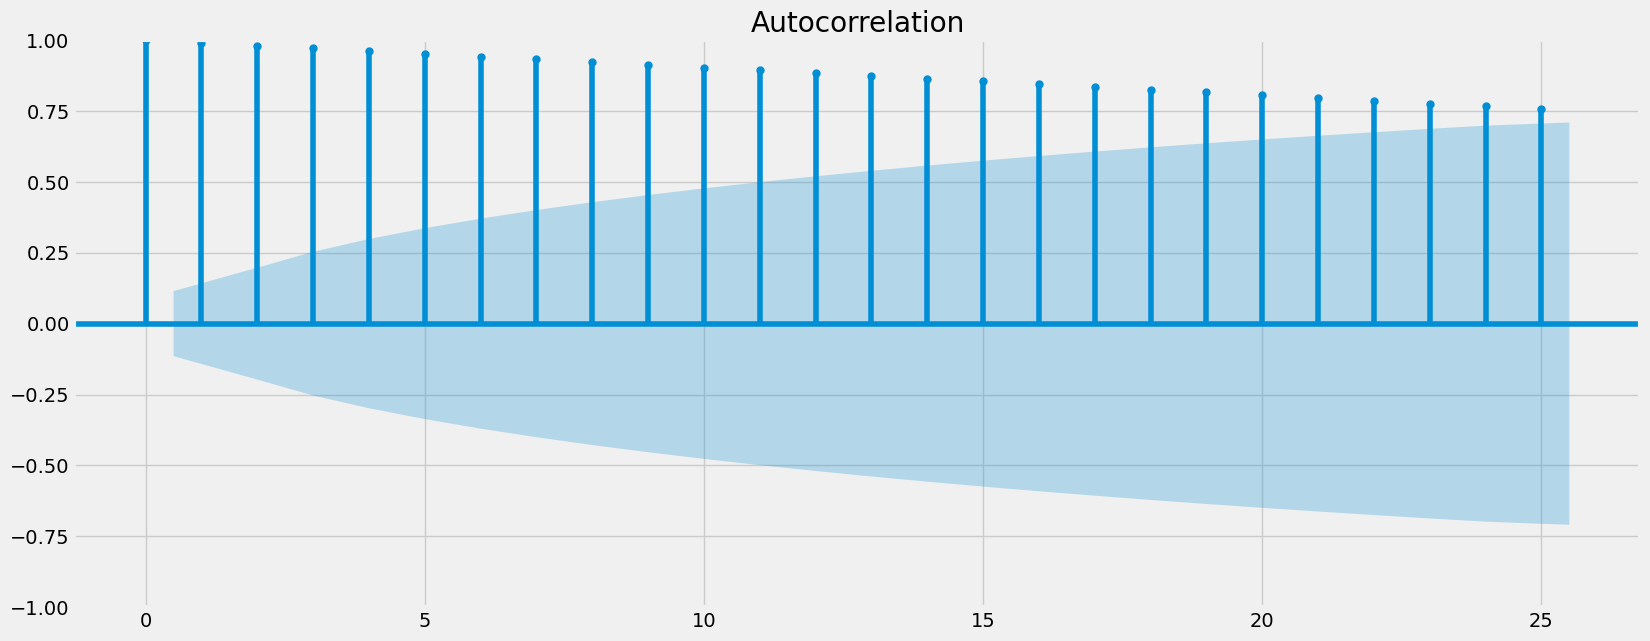

In [27]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data_sub)
plt.show()

Not stationary! The Dickey-Fuller p-value is 0.999025 and there are 26 significant lags. 

### 5. Round 2 of Startionarity and D-F

In [28]:
data_diff = data_sub - data_sub.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [29]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [30]:
data_diff.head()

,Value
datetime,
1949-04-01,27.598675
1949-07-01,28.759225
1949-10-01,27.504329
1950-01-01,29.213500
1950-04-01,29.423311


In [31]:
data_diff.columns

Index(['Value'], dtype='object')

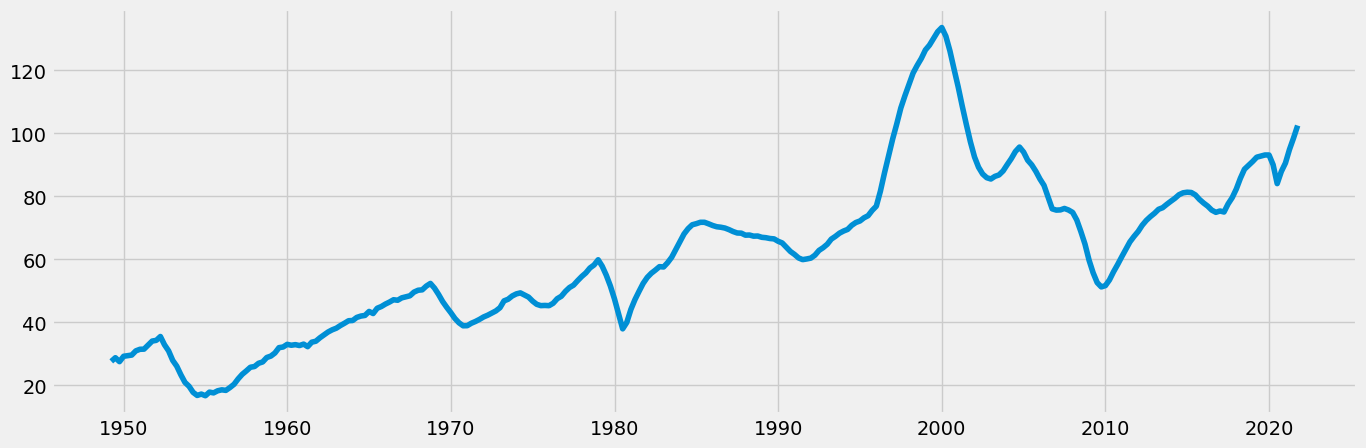

In [32]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [33]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                  -1.267320
p-value                          0.643988
Number of Lags Used              5.000000
Number of Observations Used    285.000000
Critical Value (1%)             -3.453505
Critical Value (5%)             -2.871735
Critical Value (10%)            -2.572202
dtype: float64


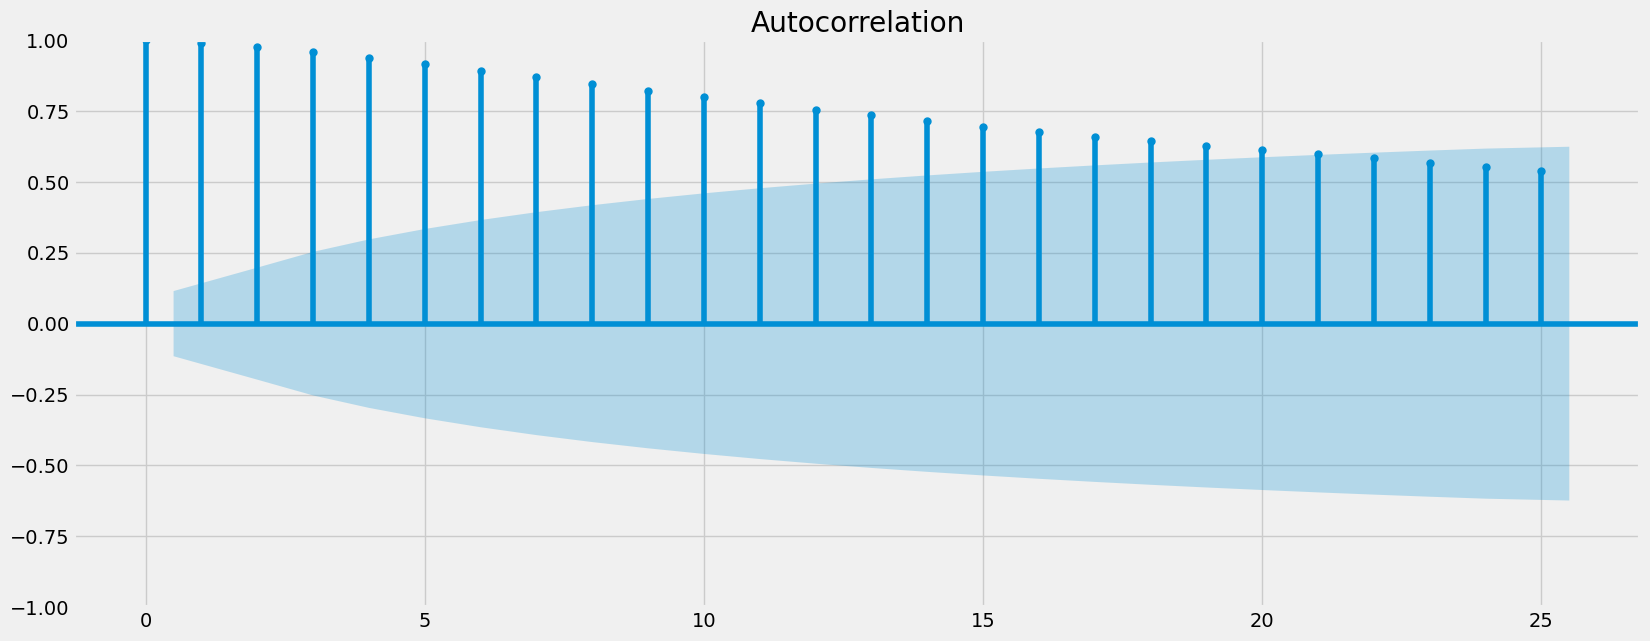

In [34]:
plot_acf(data_diff)
plt.show()

This is better our Dickey-Fuller p-value is 0.64, which is still too high. We have 21 significant lags. Going for another round of D-F. 

### 6. Round 3 of Startionarity and D-F

In [42]:
data_diff2 = data_diff - data_diff.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [43]:
data_diff2.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [44]:
data_diff2.head()

,Value
datetime,
1949-07-01,1.160550
1949-10-01,-1.254896
1950-01-01,1.709171
1950-04-01,0.209811
1950-07-01,0.177320


In [45]:
data_diff2.columns

Index(['Value'], dtype='object')

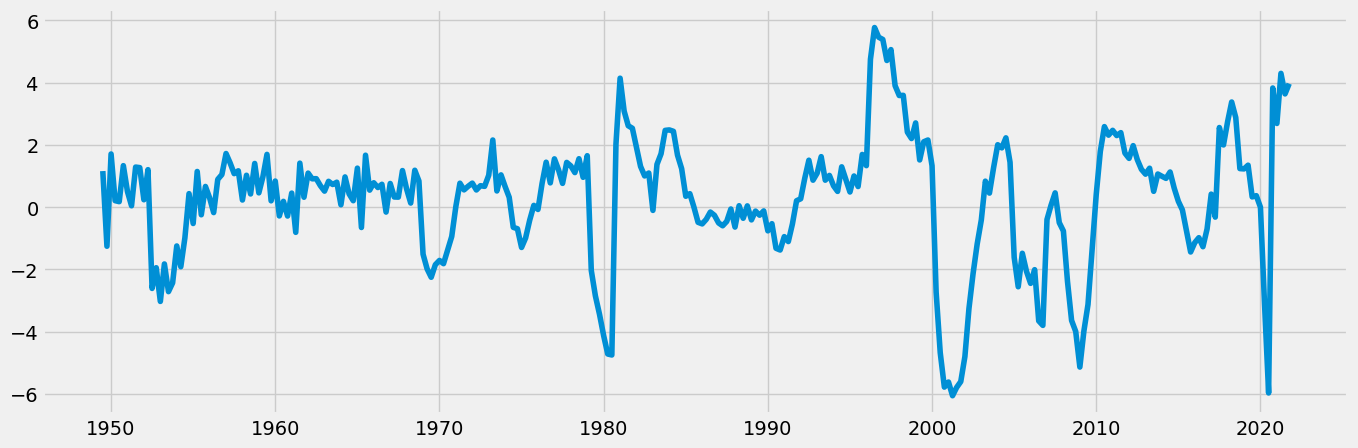

In [46]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff2)

In [47]:
dickey_fuller(data_diff2)

Dickey-Fuller Stationarity test:
Test Statistic                -5.979098e+00
p-value                        1.856871e-07
Number of Lags Used            4.000000e+00
Number of Observations Used    2.850000e+02
Critical Value (1%)           -3.453505e+00
Critical Value (5%)           -2.871735e+00
Critical Value (10%)          -2.572202e+00
dtype: float64


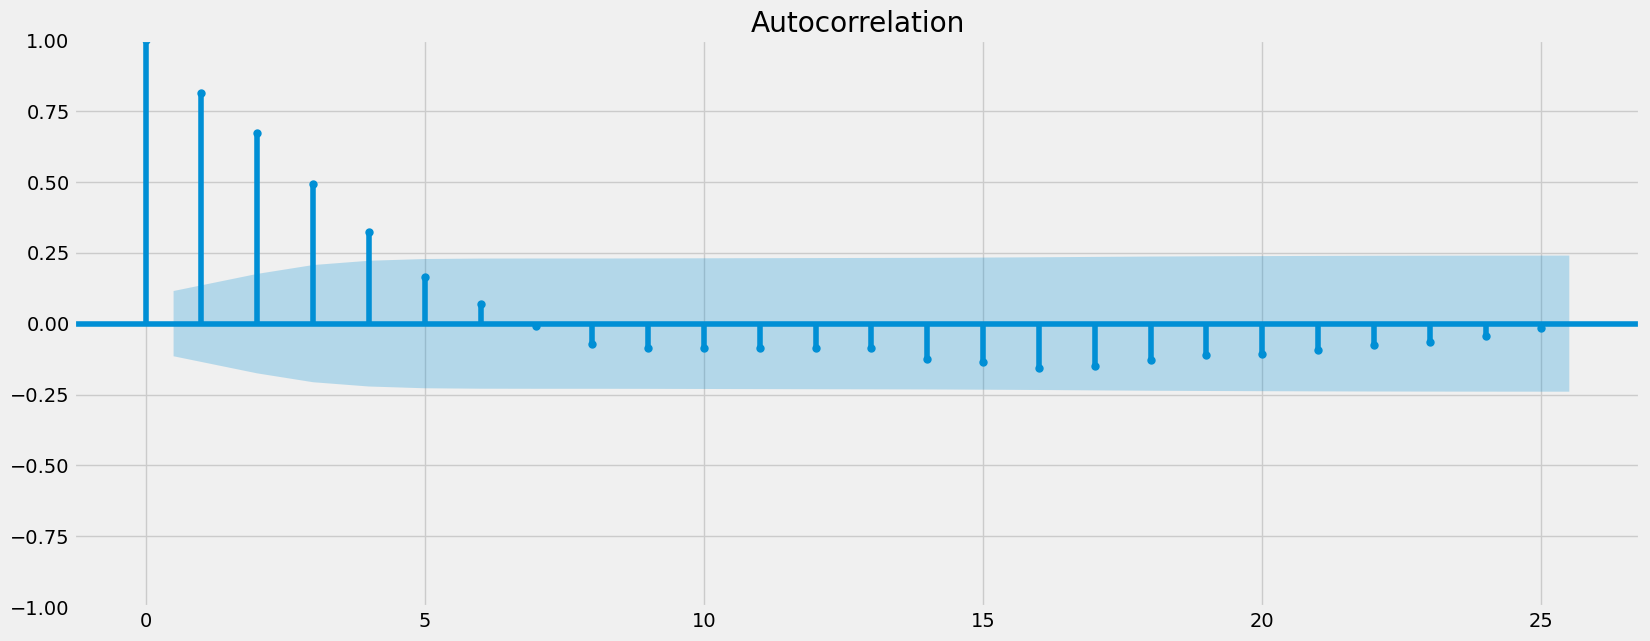

In [48]:
plot_acf(data_diff2)
plt.show()

This is much better, in terms of stationarity. Our D-F p-value is very close to 1 and we have only 5 significant lags!